In [ ]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset_train =pd.read_csv("/content/GOOG.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Open       1257 non-null   float64       
 2   High       1257 non-null   float64       
 3   Low        1257 non-null   float64       
 4   Close      1257 non-null   float64       
 5   Adj Close  1257 non-null   float64       
 6   Volume     1257 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
dataset_train.drop(['Adj Close'],axis=1)

,Date,Open,High,Low,Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,233776981
...,...,...,...,...,...,...
1252,2016-12-22,39.618000,39.666000,39.429001,39.563000,19444000
1253,2016-12-23,39.544998,39.637001,39.363998,39.495499,12468000
1254,2016-12-27,39.534000,39.893002,39.382851,39.577499,15782000
1255,2016-12-28,39.685001,39.711498,39.160000,39.252499,23076000


In [ ]:
dataset_train['Date']=pd.to_datetime(dataset_train['Date'])
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [ ]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)



[[16.262545]
 [16.563665]
 [16.491436]
 ...
 [39.534   ]
 [39.685001]
 [39.1665  ]]
(1257, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set =scaler.fit_transform(training_set)
scaled_training_set.shape

(1257, 1)

In [ ]:
X_train =[]
y_train =[]
for i in range(60,1257) :
  X_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i, 0])
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1197, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 113ms/step - loss: 0.0391
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0057
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0044
Epoch 13/100

In [ ]:
dataset_test=pd.read_csv("/content/GOOG_2017.csv")
actual_stock_price =dataset_test.iloc[:,1:2].values

In [ ]:
dataset_total =pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,311):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

8/8 [==============================] - 0s 29ms/step


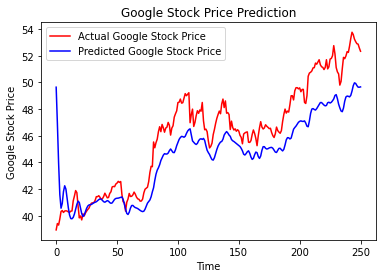

In [ ]:
plt.plot(actual_stock_price,color='red',label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()